In [25]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
        header=None)
df_wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y)
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

cov_mat = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_mat)

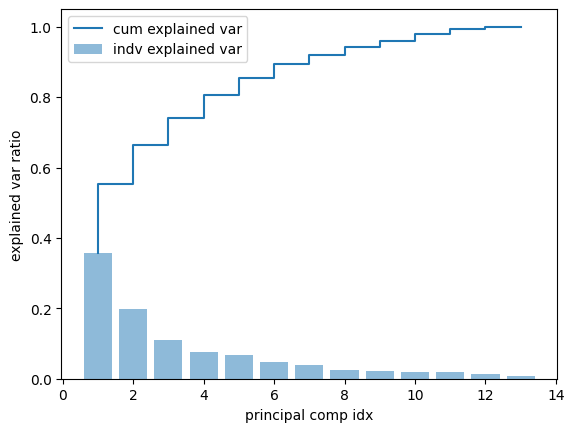

In [45]:
tot = sum(eigen_val)
var_exp = [lamda/tot for lamda in sorted(eigen_val, reverse=True)]
cum_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='indv explained var')
plt.step(range(1, 14), cum_exp, label='cum explained var')
plt.xlabel('principal comp idx')
plt.ylabel('explained var ratio')
plt.legend(loc='best')
plt.show()

In [50]:
eigen_pairs = [(abs(eigen_val[i]), eigen_vec[:, i]) for i in range(len(eigen_val))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [64]:
w = np.hstack((eigen_pairs[0][1][:, None], eigen_pairs[1][1][:, None]))
w

array([[-0.09296486,  0.49334004],
       [ 0.28001527,  0.17183086],
       [ 0.06100878,  0.31746884],
       [ 0.25600047, -0.07049345],
       [-0.10488267,  0.36362891],
       [-0.38858026,  0.08019249],
       [-0.42051598,  0.02422672],
       [ 0.28904149,  0.01240666],
       [-0.30753401, -0.01162062],
       [ 0.13005998,  0.49794366],
       [-0.30667619, -0.21036556],
       [-0.39287094, -0.11148301],
       [-0.24784347,  0.42091714]])

In [71]:
x_train_std[0].dot(w)

array([-0.72532879, -3.77071853])

In [74]:
x_train_pca = x_train_std.dot(w)

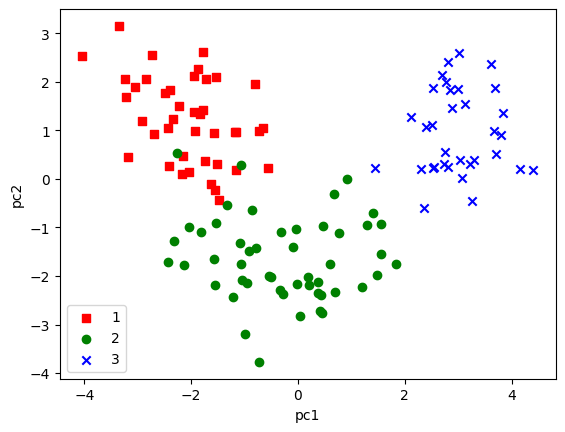

In [77]:
colors = ['r', 'g', 'b']
markers = ['s', 'o', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0], x_train_pca[y_train==l, 1], color=c, marker=m, label=l)
plt.legend(loc='best')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [82]:
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(x_train_std[y_train==label], axis=0))
mean_vecs

[array([ 0.91667931, -0.34774673,  0.29956671, -0.75507732,  0.51251109,
         0.79665831,  0.86949808, -0.47029145,  0.44694063,  0.21687488,
         0.41969418,  0.76071156,  1.17000174]),
 array([-0.86219643, -0.37012768, -0.43205869,  0.23202094, -0.42859385,
         0.03900585,  0.14288154, -0.0826511 ,  0.20815878, -0.84339782,
         0.45013324,  0.29330689, -0.70313944]),
 array([ 0.16745363,  0.99284847,  0.28244544,  0.58657948,  0.01262842,
        -1.04888737, -1.29677268,  0.70953044, -0.87068197,  1.00842487,
        -1.20345829, -1.38953087, -0.38827573])]

In [101]:
dim = 13
s_w = np.zeros((dim, dim))
for label, mv in zip(range(1, 4), mean_vecs):
    class_w = np.zeros((dim, dim))
    for row in x_train_std[y_train==label]:
        row, mv = row.reshape(dim, 1), mv.reshape(dim, 1)
        class_w += (row-mv).dot((row-mv).T)
    s_w += class_w

In [102]:
dim = 13
s_w = np.zeros((dim, dim))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(x_train_std[y_train==label].T)
    s_w += class_scatter

In [109]:
mean_overall = np.mean(x_train_std, axis=0)
dim = 13
s_b = np.zeros((dim, dim))
for i, mv in enumerate(mean_vecs):
    n = x_train[y_train==i+1, :].shape[0]
    mv = mv.reshape(dim, 1)
    mean_overall = mean_overall.reshape(dim, 1)
    s_b += n * (mv-mean_overall).dot((mv-mean_overall).T)

In [114]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
for eigen_val in eigen_pairs:
    print(eigen_val[0])

452.93086399829235
152.61427189630703
4.960816946634871e-14
4.391322546964155e-14
3.3837307064006347e-14
3.3837307064006347e-14
1.2300681730402033e-14
1.2300681730402033e-14
1.220472416045207e-14
1.220472416045207e-14
1.2767723772033512e-15
1.2767723772033512e-15
0.0


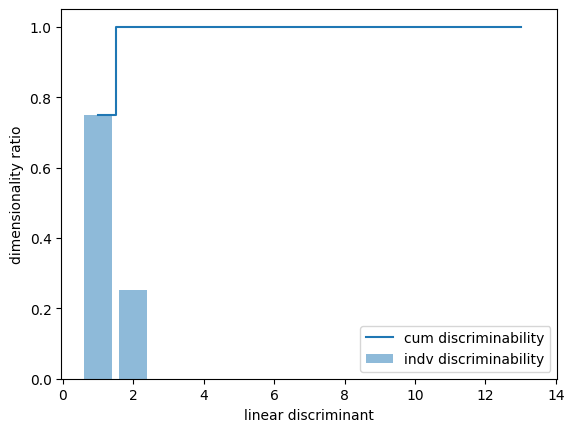

In [124]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, label='indv discriminability', align='center');
plt.step(range(1, 14), cum_discr, label='cum discriminability', where='mid')
plt.xlabel('linear discriminant')
plt.ylabel('dimensionality ratio')
plt.legend(loc='best')
plt.show()

In [127]:
w = np.hstack((eigen_pairs[0][1][:, None].real, eigen_pairs[1][1][:, None].real))

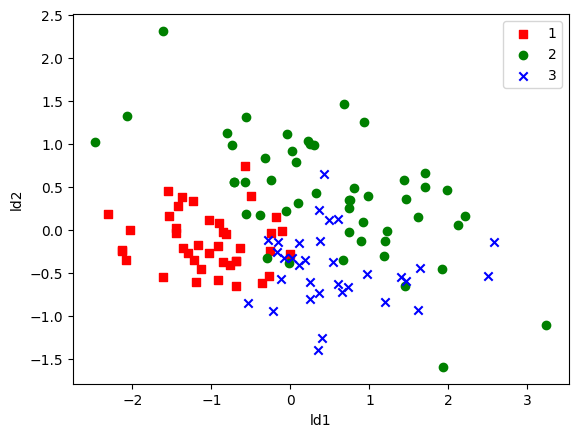

In [131]:
x_train_lda = x_train_std.dot(w)
colors = ['r', 'g', 'b']
markers = ['s', 'o', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_lda[y_train==l, 0], x_train_lda[y_train==l, 1], color=c, marker=m, label=l)
plt.legend(loc='best')
plt.xlabel('ld1')
plt.ylabel('ld2')
plt.show()